In [1]:
import os,sys
from dotenv import find_dotenv,load_dotenv
load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature
import data_reader_writer

# Setting up simulation period

We need to set the required inputs to simulate the LOPF such as the start data, end date and simualtion snaphsots

Let us start this for three days period for check

In [3]:
My_network=pypsa.Network()
My_network.import_from_csv_folder('LOPF_data_heat')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_heat has buses, generators, lines, links, loads, storage_units


In [14]:
# let us add STES to the first three buses

#My_network.add(
    #"StorageUnit",
    #"TES 1", 
    #bus="Peterhead", 
    #bus="Heat Bus 1",
    #carrier="thermal storge",
    #max_hours=2880,
    #capital_cost=100,
    #efficiency_store=0.9,
    #efficiency_dispatch=0.95,
   # standing_loss=0.001,
   # p_nom=5937,# if you just set a random value and solve the optiisation with p_nom_ext setted true, check the p_nom_opt value it will give you the optimal nominal value
   # state_of_charge_initial=1440000,
   # p_nom_extendable=True,
    #cyclic_state_of_charge=True,
   # cyclic_state_of_charge=False,
    
#)


#My_network.add(
   # "StorageUnit",
    #"TES 2", 
    #bus="Peterhead", 
    #bus="Heat Bus 2",
    #carrier="thermal storge",
    #max_hours=2880,
    #capital_cost=100,
    #efficiency_store=0.9,
    #efficiency_dispatch=0.95,
    #standing_loss=0.001,
    #p_nom=6443,
    #state_of_charge_initial=1440000,
   # p_nom_extendable=True,
    #cyclic_state_of_charge=True,
    #cyclic_state_of_charge=False,
    
#)

#My_network.add(
 #   "StorageUnit",
  #  "TES 3", 
   # #bus="Peterhead", 
    #bus="Heat Bus 3",
    #carrier="thermal storge",
    #max_hours=2880,
    #capital_cost=100,
    #efficiency_store=0.9,
    #efficiency_dispatch=0.95,
    #standing_loss=0.001,
    #p_nom=6133,
    #state_of_charge_initial=1440000,
    #p_nom_extendable=True,
    #cyclic_state_of_charge=True,
   # cyclic_state_of_charge=False,
    
#)

 Let us import the heat demand for the gas boiler

In [4]:
heating_EDRP=pd.read_csv('REMA/domestic_EDRP/scaled with normalised profiles/hourly heat demand total_withGasboilers_MW.csv')

In [5]:
heating_EDRP

,Timestamp,Beauly Heat Demand With Gas Boilers,Peterhead Heat Demand With Gas Boilers,Errochty Heat Demand With Gas Boilers,Denny_Bonny/bridge Heat Demand With Gas Boilers,Neilston Heat Demand With Gas Boilers,Strathavenorness Heat Demand With Gas Boilers,Torness Heat Demand With Gas Boilers,Eccles Heat Demand With Gas Boilers,Harker Heat Demand With Gas Boilers,...,Bramford Heat Demand With Gas Boilers,Pelham Heat Demand With Gas Boilers,Sundon_East Heat Demand With Gas Boilers,Melksham Heat Demand With Gas Boilers,Bramley Heat Demand With Gas Boilers,London Heat Demand With Gas Boilers,Kemsley Heat Demand With Gas Boilers,Sellindge Heat Demand With Gas Boilers,Lovedean Heat Demand With Gas Boilers,S_W_Pensiula Heat Demand With Gas Boilers
0,01/01/2022 00:00,426.543621,639.238651,304.142984,1575.059203,2304.102987,758.400432,1393.122169,484.308640,649.700722,...,2397.153686,1811.542764,2948.010518,4691.224612,3022.862106,12932.08959,2714.235549,649.393094,3392.240749,2208.454250
1,01/01/2022 01:00,426.543621,558.473381,304.142984,1575.059203,2304.102987,758.400432,1318.500223,458.366871,564.646641,...,2083.335807,1811.542764,2562.078480,4077.083698,2627.131045,11239.11474,2714.235549,564.379286,2948.153329,1638.326191
2,01/01/2022 02:00,426.543621,563.568445,265.025696,1372.483281,2304.102987,758.400432,1321.986402,459.578815,649.700722,...,2088.844248,1811.542764,2948.010518,4087.863705,2634.077307,11268.83150,2365.144692,565.871532,2948.153329,1638.326191
3,01/01/2022 03:00,447.048132,681.580039,316.736318,1640.276048,2399.506593,789.802733,1579.926444,549.249767,676.602207,...,2496.410145,1811.542764,3070.075736,4087.863705,2627.131045,13467.55523,2826.621089,676.281841,3532.699748,1963.166048
4,01/01/2022 04:00,790.354002,1215.998618,316.736318,1640.276048,2399.506593,789.802733,2821.320525,980.811257,1208.228206,...,4457.912081,1811.542764,5482.323382,8724.124362,5621.522551,24049.40441,5047.579350,676.281841,6308.444513,3505.682614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2022 19:00,5976.716549,2379.444272,3834.755600,19858.972280,38029.289550,12517.422090,9770.511383,3396.646167,12780.514690,...,20419.404010,8435.226853,2948.010518,34348.010080,2634.077307,103152.20710,20750.477140,1987.564530,15795.553290,24033.955210
8756,31/12/2022 20:00,5976.716549,4827.117399,5950.818531,30817.385140,40041.153700,13179.631480,14448.817530,5023.024770,16242.552430,...,2496.410145,8435.226853,16450.703760,34348.010080,2627.131045,103152.20710,2714.235549,5125.324984,15795.553290,9512.884850
8757,31/12/2022 21:00,5976.716549,1690.180268,5950.818531,30817.385140,38029.289550,12517.422090,9770.511383,3396.646167,7492.805899,...,7077.507017,1811.542764,16450.703760,26695.150510,9222.019879,54768.81426,13057.128440,5360.832691,5074.392536,5947.499450
8758,31/12/2022 22:00,5976.716549,8281.492966,5950.818531,30817.385140,34840.774610,11467.915570,29256.720670,10170.883000,12657.114620,...,7077.507017,8435.226853,11390.466380,84972.662730,40217.323020,39452.67204,8280.475028,1735.766607,6308.444513,25834.290030


Text(0, 0.5, 'Heating demand in MWh')

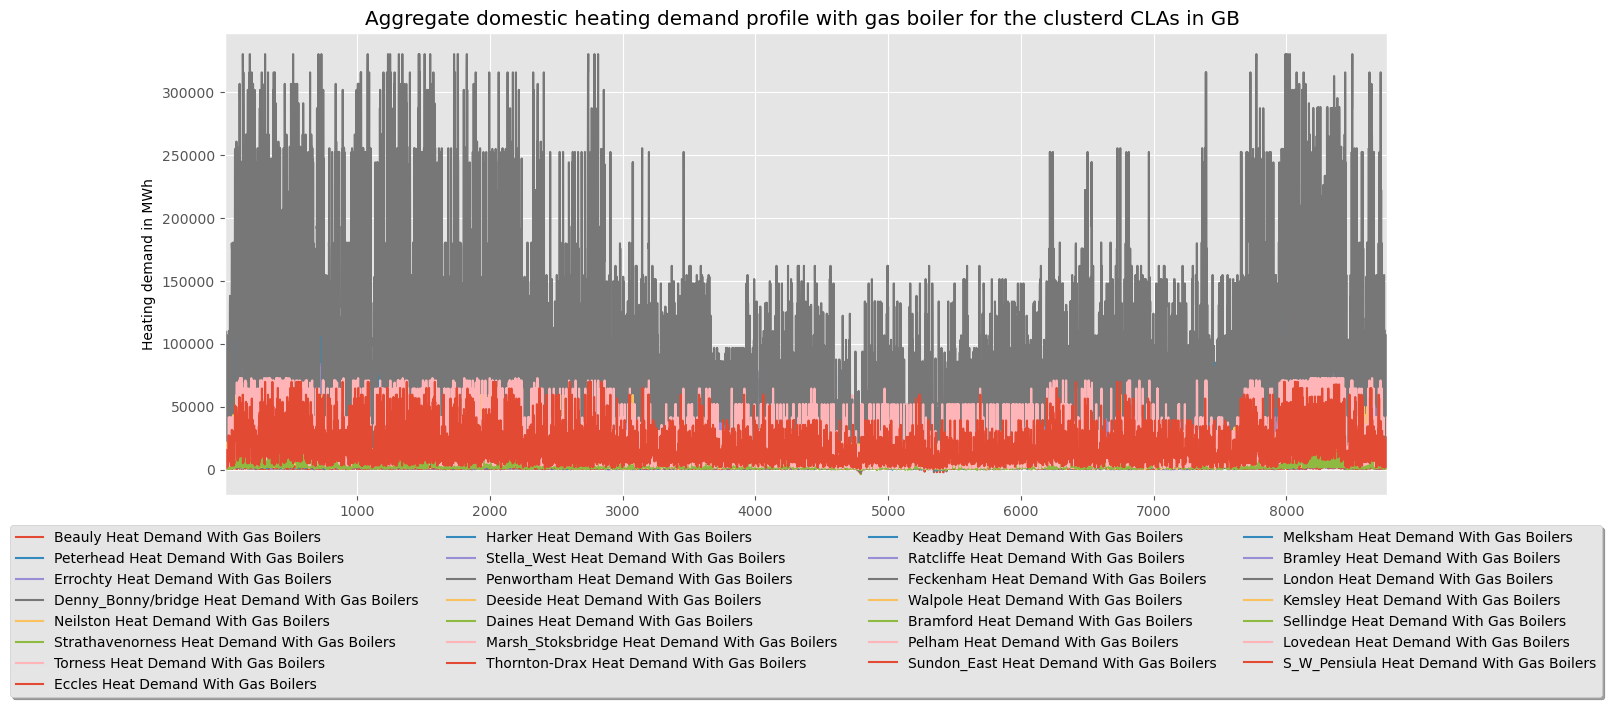

In [6]:
fig, ax= plt.subplots(1,1)
fig.set_size_inches(15,6)

heating_EDRP.plot(ax=ax)

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlim([1, 8760])
plt.title('Aggregate domestic heating demand profile with gas boiler for the clusterd CLAs in GB ')
plt.ylabel('Heating demand in MWh')

In [7]:
heating_EDRP_DHN=pd.read_csv('REMA/domestic_EDRP/DHN/scaled with normalised profiles/hourly heat demand total_withDHN_MW.csv')
heating_EDRP

,Timestamp,Beauly Heat Demand With Gas Boilers,Peterhead Heat Demand With Gas Boilers,Errochty Heat Demand With Gas Boilers,Denny_Bonny/bridge Heat Demand With Gas Boilers,Neilston Heat Demand With Gas Boilers,Strathavenorness Heat Demand With Gas Boilers,Torness Heat Demand With Gas Boilers,Eccles Heat Demand With Gas Boilers,Harker Heat Demand With Gas Boilers,...,Bramford Heat Demand With Gas Boilers,Pelham Heat Demand With Gas Boilers,Sundon_East Heat Demand With Gas Boilers,Melksham Heat Demand With Gas Boilers,Bramley Heat Demand With Gas Boilers,London Heat Demand With Gas Boilers,Kemsley Heat Demand With Gas Boilers,Sellindge Heat Demand With Gas Boilers,Lovedean Heat Demand With Gas Boilers,S_W_Pensiula Heat Demand With Gas Boilers
0,01/01/2022 00:00,426.543621,639.238651,304.142984,1575.059203,2304.102987,758.400432,1393.122169,484.308640,649.700722,...,2397.153686,1811.542764,2948.010518,4691.224612,3022.862106,12932.08959,2714.235549,649.393094,3392.240749,2208.454250
1,01/01/2022 01:00,426.543621,558.473381,304.142984,1575.059203,2304.102987,758.400432,1318.500223,458.366871,564.646641,...,2083.335807,1811.542764,2562.078480,4077.083698,2627.131045,11239.11474,2714.235549,564.379286,2948.153329,1638.326191
2,01/01/2022 02:00,426.543621,563.568445,265.025696,1372.483281,2304.102987,758.400432,1321.986402,459.578815,649.700722,...,2088.844248,1811.542764,2948.010518,4087.863705,2634.077307,11268.83150,2365.144692,565.871532,2948.153329,1638.326191
3,01/01/2022 03:00,447.048132,681.580039,316.736318,1640.276048,2399.506593,789.802733,1579.926444,549.249767,676.602207,...,2496.410145,1811.542764,3070.075736,4087.863705,2627.131045,13467.55523,2826.621089,676.281841,3532.699748,1963.166048
4,01/01/2022 04:00,790.354002,1215.998618,316.736318,1640.276048,2399.506593,789.802733,2821.320525,980.811257,1208.228206,...,4457.912081,1811.542764,5482.323382,8724.124362,5621.522551,24049.40441,5047.579350,676.281841,6308.444513,3505.682614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2022 19:00,5976.716549,2379.444272,3834.755600,19858.972280,38029.289550,12517.422090,9770.511383,3396.646167,12780.514690,...,20419.404010,8435.226853,2948.010518,34348.010080,2634.077307,103152.20710,20750.477140,1987.564530,15795.553290,24033.955210
8756,31/12/2022 20:00,5976.716549,4827.117399,5950.818531,30817.385140,40041.153700,13179.631480,14448.817530,5023.024770,16242.552430,...,2496.410145,8435.226853,16450.703760,34348.010080,2627.131045,103152.20710,2714.235549,5125.324984,15795.553290,9512.884850
8757,31/12/2022 21:00,5976.716549,1690.180268,5950.818531,30817.385140,38029.289550,12517.422090,9770.511383,3396.646167,7492.805899,...,7077.507017,1811.542764,16450.703760,26695.150510,9222.019879,54768.81426,13057.128440,5360.832691,5074.392536,5947.499450
8758,31/12/2022 22:00,5976.716549,8281.492966,5950.818531,30817.385140,34840.774610,11467.915570,29256.720670,10170.883000,12657.114620,...,7077.507017,8435.226853,11390.466380,84972.662730,40217.323020,39452.67204,8280.475028,1735.766607,6308.444513,25834.290030


Text(0, 0.5, 'Heat demand in MWh')

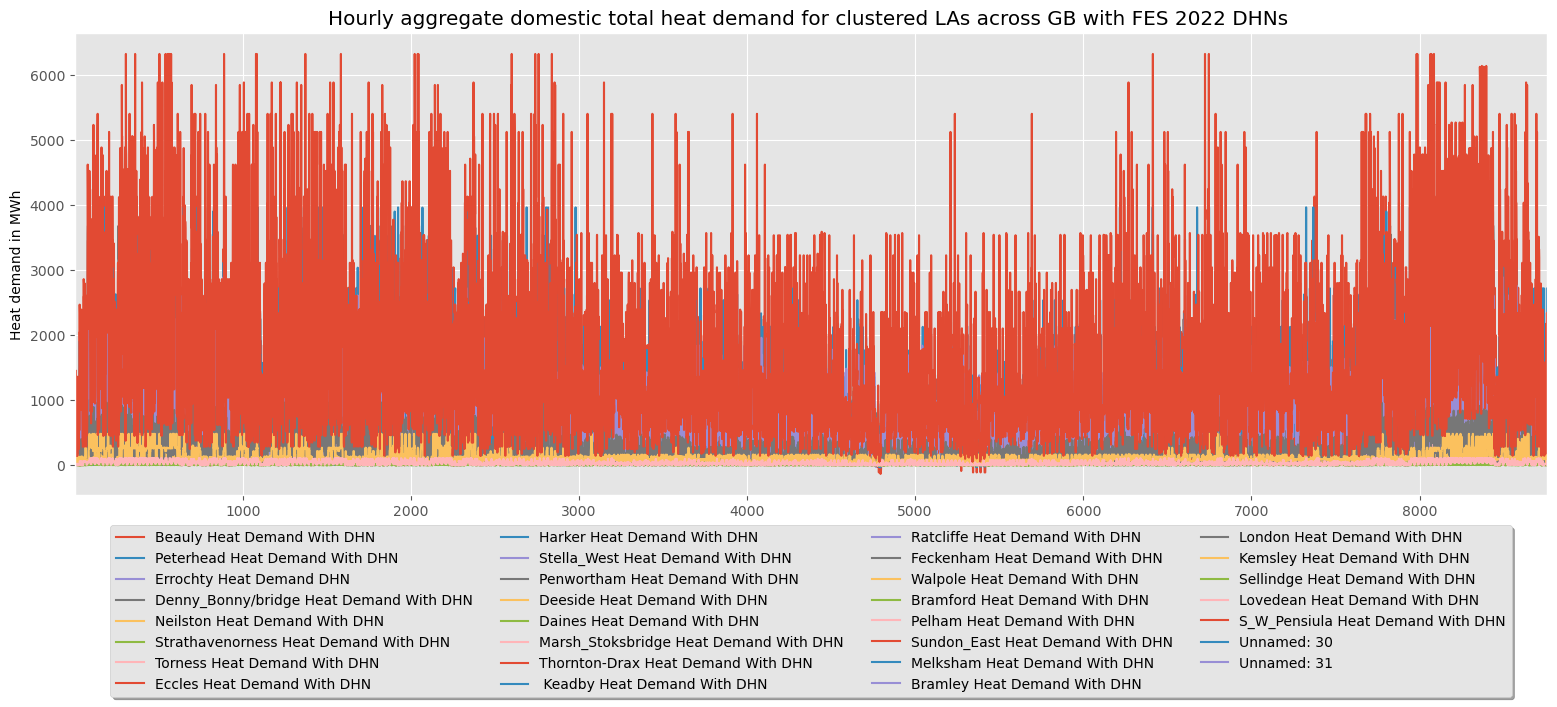

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(19,6)
heating_EDRP_DHN.plot(ax=ax)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
#plt.legend(loc=(1.0,1.0))
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
plt.xlim([1, 8760])
plt.title('Hourly aggregate domestic total heat demand for clustered LAs across GB with FES 2022 DHNs ')
plt.ylabel('Heat demand in MWh')

In [9]:
heating_RHPP=pd.read_csv('REMA/domestic_RHPP/scaled with normalised profiles/hourly heat demand total_withHPs_MW.csv')


Text(0, 0.5, 'Heat demand in MWh')

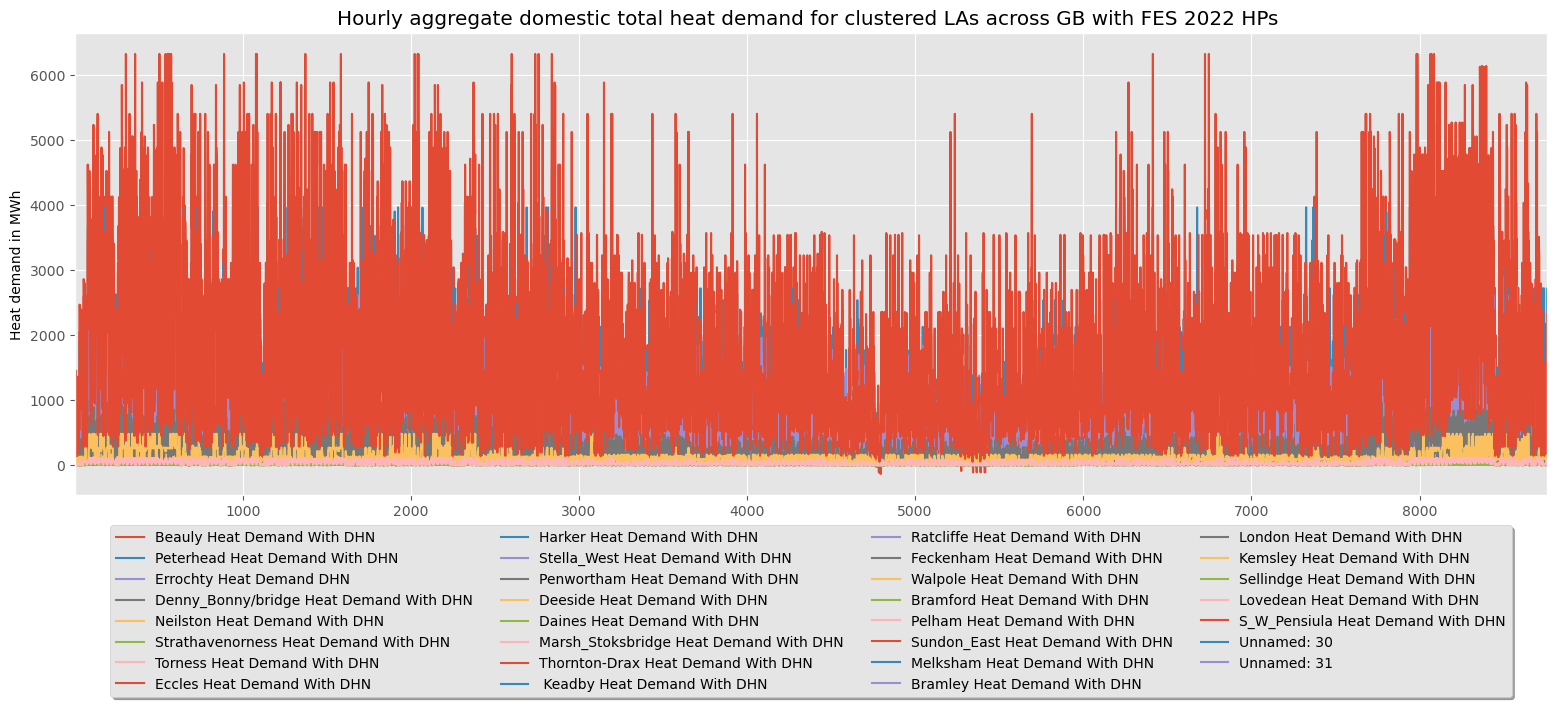

In [10]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(19,6)
heating_EDRP_DHN.plot(ax=ax)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
#plt.legend(loc=(1.0,1.0))
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
plt.xlim([1, 8760])
plt.title('Hourly aggregate domestic total heat demand for clustered LAs across GB with FES 2022 HPs ')
plt.ylabel('Heat demand in MWh')

In [11]:
My_network

PyPSA Network
Components:
 - Bus: 64
 - Generator: 657
 - Line: 105
 - Link: 29
 - Load: 64
 - StorageUnit: 11
Snapshots: 8760

In [12]:
# add the heat demand profile with gas boilers
for i in range(29):
    My_network.add(
    'Load',
    'load gas {}'.format(i+1),
    bus='Heat Bus {}'.format(i+1),
        p_set=heating_EDRP.iloc[:,1].values.tolist(),
    )

In [13]:
My_network.loads_t.p_set
My_network.generators

,carrier,p_nom,type,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Drax - coal units,Coal,1980.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Ratcliffe,Coal,2000.0,,Ratcliffe,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Cottam,Coal,2008.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
West Burton,Coal,2012.0,,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Eggborough,Coal,1960.0,,Thornton/Drax/Eggborough,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interconnector Deeside,Interconnector,600.0,Interconnector,Deeside,20.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Interconnector Sellindge,Interconnector,3200.0,Interconnector,Sellindge,20.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Interconnector Neilston,Interconnector,600.0,Interconnector,Neilston,20.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


To approximate n-1 security and allow room for reactive power flows, don't allow any line to be loaded above 70% of thier thermal rating

In [ ]:
My_network.lines

In [ ]:
contingency_factor = 0.7
My_network.lines.s_max_pu[0:99] *= contingency_factor    # we have 105 lines but 6 of them are interconnectors

In [ ]:
COPs=pd.read_csv('LOPF_data_heat/hourly COP_HPs.csv')
cop_1=COPs['Beauly COP'].values.tolist()

In [ ]:
for i in range(29):
    My_network.add(
        "Generator",
        "boiler {}".format(i+1),
       bus="Heat Bus {}".format(i+1),
       p_nom_extendable=True,
        efficiency=0.94,
        marginal_cost=20.0,
        carrier="gas",
    )
    # all the boilers are assumed as 94% efficient, the other electrical generators are assumed as 100% efficient

In [ ]:
My_network.generators.efficiency

In [ ]:
My_network.loads_t.p_set

In [ ]:
My_network

In [ ]:
My_network.consistency_check()

In [ ]:
 My_network.lopf(My_network.snapshots,solver_name="gurobi", pyomo=False)

In [ ]:
mismatch = My_network.loads_t.p_set.sum(axis=1) - My_network.generators_t.p.sum(axis=1)

# include the storage charge and discharge

# Estimate the Curtailed VRE Production & Investigate the Impact of Adding a Storage Unit


In [ ]:
# calculating the curtailment time series
#https://groups.google.com/g/pypsa/c/0ZhL_EWcS9U/m/TX0fbhdVCgAJ
#curt_t = (My_network.generators_t.p_max_pu * My_network.generators.p_nom_opt - My_network.generators_t.p).clip(lower=0)
#curt_t.groupby(My_network.generators.carriers, axis=1).sum()  
My_network.generators

#capacity = My_network.generators.groupby("carrier").sum()
#carrier

In [ ]:
My_network.storage_units_t.p_dispatch

In [ ]:
My_network.generators.p_nom_opt     # MW this are the nominal capcity of generators specified

In [ ]:
df_network = pd.read_csv('LOPF_data_heat/buses.csv')
lon = df_network.iloc[28:]['x'].values
lat = df_network.iloc[28:]['y'].values
coordinates = np.zeros(shape=(len(lon), 2))
for i in range(len(lon)):
    coordinates[i][0] = lon[i]
    coordinates[i][1] = lat[i]

df_lines = pd.read_csv('LOPF_data_heat/lines.csv', index_col=0)
df_buses = pd.read_csv('LOPF_data_heat/buses.csv', index_col=0)

# Extract the coordinates of buses and lines for the sake of plotting
line_coordinates = []
for i in range(len(df_lines['bus0'].values)):

    bus0 = df_lines['bus0'].iloc[i]
    bus1 = df_lines['bus1'].iloc[i]
    bus0_coord = [df_buses.iloc[29:]['x'][bus0], df_buses.iloc[29:]['y'][bus0]]
    bus1_coord = [df_buses.iloc[29:]['x'][bus1], df_buses.iloc[29:]['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])
    

In [ ]:
df_buses.iloc[28:].index
#df_lines['bus0'].iloc[98]

In [ ]:
# then using the above information, plot the network
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

#extent = [-8.09782, 2.40511, 60, 49.5]
#ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='black')

# display the rconnection for the heat buses and also the electric bus Beally connection with the heat bus 3 in the figure
#for h in range(4):
 #   ax.plot([df_buses['x'].iloc[h],df_buses['x'].iloc[h+1]],
 #           [df_buses['y'].iloc[h],df_buses['y'].iloc[h+1]],
 #          color='red')
    
# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')

#ax.scatter(lon[0:4], lat[0:4], c='red', edgecolors='red')
#ax.scatter(lon[4:], lat[4:], c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses.iloc[29:57].index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='blue',
                fontsize='large')

ax.set_title('Reduced GB network with four heat buses  close to the first four electric buses', fontsize=20)
fig.tight_layout()

In [ ]:
My_network.links_t.p0

In [ ]:
My_network.links_t.efficiency

In [ ]:
My_network.links_t.p1

In [ ]:
# add the heat pumps and storage[discharging] to generators dataframe or visulaise them independantly.

In [ ]:
p_by_carrier=My_network.generators_t.p.groupby(My_network.generators.carrier,axis=1).sum()
p_by_carrier

In [ ]:
fig, ax= plt.subplots(figsize=(18, 6))

p_by_carrier.plot(ax=ax,kind='area')

# put a legend below current axis
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.05),
         fancybox=True,shadow=True,ncol=4)
#plt.legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
My_network.storage_units_t.p

In [ ]:
# plot the storage dispatch, charging?discharge? This will plot the total charging and discharging power by the aggregate storage unit per time step.
p_by_storage=My_network.storage_units_t.p.groupby(My_network.storage_units.carrier,axis=1).sum()
p_by_storage
fig, ax= plt.subplots(figsize=(18, 6))
p_by_storage.plot(ax=ax)


In [ ]:
# interconnector exports
exports = My_network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1

interconnector_export = exports[['Interconnectors Export']]


# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'] +
    p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    p_by_carrier['Sewage Sludge Digestion'])


# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

In [ ]:
# Add the heat pump dispatch to the generation data frame
p_hp=My_network.links_t.p0.sum(axis=1)   # this is the electricty dispatched then, this will be multiplied by cop to get the HP output
p_by_carrier['Heat Pump']=p_hp.values.tolist()

In [ ]:
p_by_carrier

In [ ]:
cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        'EfW Incineration',
        "Coal", "Oil", "Natural Gas", 'Hydro',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import','Heat Pump'
       ]

In [ ]:
# we have aroudn 20 columns (generation type) but let us visualise the generation for the following types
#cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        #'EfW Incineration',
        #"Coal", "Oil", "Natural Gas", 'Pumped Storage Hydroelectric', 'Hydro',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import','Heat Pump'
       # ]
p_by_carrier = p_by_carrier[cols]



#p_by_carrier.drop(
    #(p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    #axis=1, inplace=True)

    

colors = {
        "Coal": "grey",
        "Diesel/Gas oil": "black",
        "Diesel/gas Diesel/Gas oil": "black",
        'Oil': 'black',
        'Anaerobic Digestion': 'green',
        'EfW Incineration': 'chocolate',
        'Sewage Sludge Digestion': 'green',
        'Landfill Gas': 'green',
        'Biomass (dedicated)': 'green',
        'Biomass (co-firing)': 'green',
        'Biomass': 'green',
        'Interconnectors Import': 'pink',
        "Sour gas": "lightcoral",
        "Natural Gas": "lightcoral",
        "Nuclear": "orange",
        'Shoreline Wave': 'aqua',
        'Tidal Barrage and Tidal Stream': 'aqua',
        'Hydro': "turquoise",
        "Large Hydro": "turquoise",
        "Small Hydro": "turquoise",
        "Pumped Storage Hydroelectric": "darkturquoise",
        "Wind Offshore": "lightskyblue",
        'Wind Onshore': 'deepskyblue',
        'Solar Photovoltaics': 'yellow',
        'Heat Pump': 'red'
}

    
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,8)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])   
    
    
    # Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])

    
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("Dispatch in GW")
ax.set_xlabel("")

In [ ]:
My_network.storage_units_t.state_of_charge

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = My_network.storage_units_t.p.sum(axis=1)
state_of_charge = My_network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Plotting line loading
Look at the line loading stats and graph it

In [ ]:
My_network.snapshots[139]

In [ ]:
now = My_network.snapshots[139]

print("With the linear load flow, there is the following per unit loading:")
loading = My_network.lines_t.p0.loc[now] / My_network.lines.s_nom
loading.describe()

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)
My_network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

In [ ]:
My_network.buses_t.marginal_price

In [ ]:
My_network.buses_t.marginal_price
fig,ax=plt.subplots(1,1)
fig.set_size_inches(19,8)
My_network.buses_t.marginal_price['Heat Bus 1'].plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

My_network.plot(ax=ax, line_widths=pd.Series(1, My_network.lines.index))
plt.hexbin(My_network.buses.x, My_network.buses.y,
           gridsize=20,
           C=My_network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar
cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')